In [125]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
import seaborn as sns
import pandas as pd
import numpy as np
import os


In [126]:
import pandas as pd

def read_node_data(file_path):
    df = pd.read_csv(file_path,
                     skiprows=4,  # Skip title row
                     sep=r'\s+',  # Use regex to handle variable spaces
                     names=["Time", "Elevation", "Base_Demand", "Initial_Quality", 
                            "Demand", "Head", "Pressure", "Quality"],
                     engine="python")  # More flexible parsing
    df.columns = df.columns.str.strip()

    return df

file_path = "Nodal_Data/Linear_Leak_node_8.csv"  # Adjust this path
node_df = read_node_data(file_path)
node_df.head()  


,Time,Elevation,Base_Demand,Initial_Quality,Demand,Head,Pressure,Quality
0,0:00,0,4,0,0.0,3.33,1.44,0.0
1,0:01,0,4,0,0.0,3.31,1.44,0.0
2,0:02,0,4,0,0.0,3.29,1.43,0.0
3,0:03,0,4,0,0.0,3.27,1.42,0.0
4,0:04,0,4,0,0.0,3.25,1.41,0.0


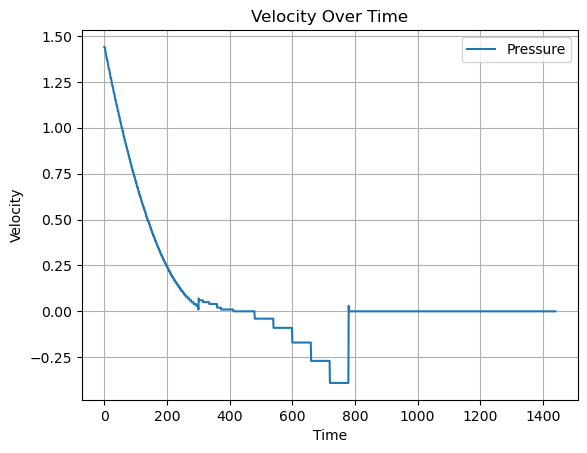

In [127]:
node_df.plot(y='Pressure', kind='line', title='Velocity Over Time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.grid()
plt.show()

In [128]:
def compute_snr(signal):
    signal_power = np.mean(signal ** 2)
    noise_power = np.var(signal)
    if noise_power == 0:
        return float('inf')
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

In [129]:
signal = node_df["Pressure"].to_numpy()
snr = compute_snr(signal)
print(f"SNR: {snr:.2f} dB")

SNR: 0.23 dB


In [130]:
def add_gaussian_noise(signal, snr=10):
    if snr >= 0:
        try:  
            signal_power = np.mean(signal ** 2)
            noise_power = signal_power / (10 ** (snr / 10))
            noise = np.random.normal(0, np.sqrt(noise_power), signal.shape)
            noisy_signal = signal + noise
            return noisy_signal
        except Exception as e:
            print(f"Error adding noise: {e}")
            return signal


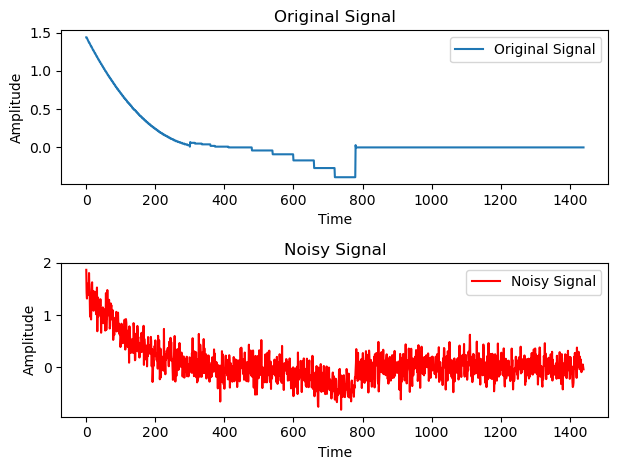

In [131]:
noise_singal = add_gaussian_noise(signal,5)


subplot(2, 1, 1)
plt.plot(signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
subplot(2, 1, 2)
plt.plot(noise_singal, label='Noisy Signal', color='red')
plt.title('Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

## Reading the data from the Link_dataset

In [132]:
def read_link_data(file_path):
    df = pd.read_csv(file_path,
                     skiprows=4,  # Skip title row
                     sep=r'\s+',  # Use regex to handle variable spaces
                     names=["Time (Hours)", "Flow(GPM)", "Velocity(fps)", "Headloss(ft/Kft)","Friction factor", "Reaction f", "Quality", "Status"],
                     engine="python")  # More flexible parsing
    df.columns = df.columns.str.strip()

    return df

link_file_path = "Link_data/Uniform_Leak_Link_2.csv"  # Adjust this path
link_df = read_link_data(link_file_path)
link_df.head()

,Time (Hours),Flow(GPM),Velocity(fps),Headloss(ft/Kft),Friction factor,Reaction f,Quality,Status
0,0:00,1.54,0.00,0.0,0.000,0.0,0.0,Open
1,0:01,-3.56,0.01,0.0,0.022,0.0,0.0,Open
2,0:02,-0.16,0.00,0.0,0.000,0.0,0.0,Open
3,0:03,-0.03,0.00,0.0,0.000,0.0,0.0,Open
4,0:04,-0.01,0.00,0.0,0.000,0.0,0.0,Open


In [133]:
signal_d = link_df["Velocity(fps)"].to_numpy()
snr = compute_snr(signal)
print(f"SNR: {snr:.2f} dB")

SNR: 0.23 dB


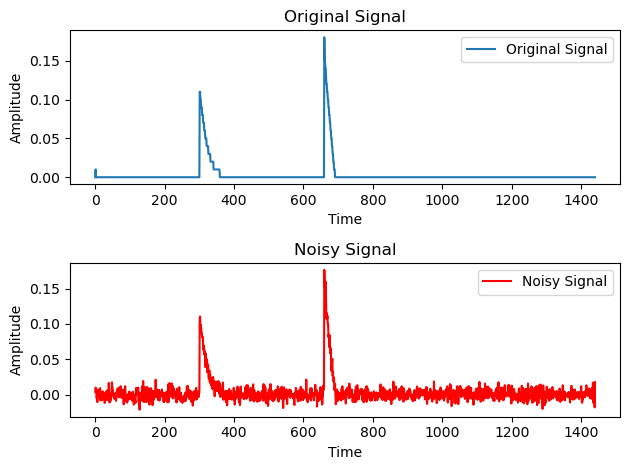

In [134]:
noise_singal = add_gaussian_noise(signal_d,8)


subplot(2, 1, 1)
plt.plot(signal_d, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
subplot(2, 1, 2)
plt.plot(noise_singal, label='Noisy Signal', color='red')
plt.title('Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

In [135]:
link_file_path = "Link_data/Uniform_Leak_With_PumpCurve_Link_2.csv"  # Adjust this path
link_df = read_link_data(link_file_path)
link_df.head()

,Time (Hours),Flow(GPM),Velocity(fps),Headloss(ft/Kft),Friction factor,Reaction f,Quality,Status
0,0:00,-891.86,2.53,3.33,0.034,0.0,0.0,Open
1,0:01,-888.93,2.52,3.31,0.034,0.0,0.0,Open
2,0:02,-886.01,2.51,3.29,0.034,0.0,0.0,Open
3,0:03,-883.08,2.51,3.27,0.034,0.0,0.0,Open
4,0:04,-880.16,2.50,3.25,0.034,0.0,0.0,Open


In [136]:
signal_d = link_df["Velocity(fps)"].to_numpy()
snr = compute_snr(signal)
print(f"SNR: {snr:.2f} dB")

SNR: 0.23 dB


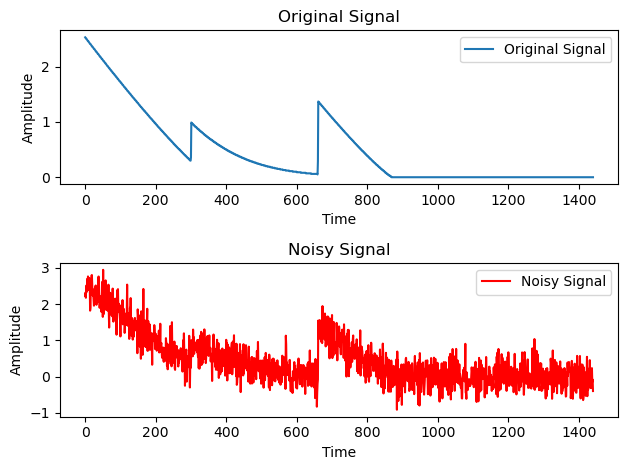

In [137]:
noise_singal = add_gaussian_noise(signal_d,8)


subplot(2, 1, 1)
plt.plot(signal_d, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
subplot(2, 1, 2)
plt.plot(noise_singal, label='Noisy Signal', color='red')
plt.title('Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

In [138]:
# Add the noise column to the dataset
link_df['Noisy_Velocity'] = noise_singal

# Save the updated dataset to a new CSV file
output_file_path = "Noisedata/Uniform_Leak_With_PumpCurve_Link_2_with_noise.csv"
link_df.to_csv(output_file_path, index=False)

print(f"Updated dataset saved to {output_file_path}")

Updated dataset saved to Noisedata/Uniform_Leak_With_PumpCurve_Link_2_with_noise.csv
